# ANN Coursework - ResNet50 Technique

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib
import cv2
from tensorflow.keras import layers
from sklearn.model_selection import KFold, StratifiedKFold
import glob
import csv
import numpy as np
import pandas as pd
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.optimizers import RMSprop,Adam
from sklearn import metrics
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
import pathlib
from IPython.display import Image, display
import os, random
from keras.layers import Input
from tensorflow.keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import seaborn as sns


In [2]:
data_train = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training"
data_test = r"C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing"

path_train = pathlib.Path(data_train)
path_test = pathlib.Path(data_test)

print(path_train)
image_count_train = len(list(path_train.glob('*/*.jpg')))
print(image_count_train)

print(path_test)
image_count_test = len(list(path_test.glob('*/*.jpg')))
print(image_count_test)

C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Training
2870
C:\Users\giorg\Jupyter notebooks\Artificial Neural Networks_CW\BrainTumor\Testing
394


In [3]:
categories = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] # create our categories to map them with the iamges

for category in categories:
    path_tr = os.path.join(path_train,category) 

 # read the image as an array
    
    for img in os.listdir(path_tr):
        img_array_tr = cv2.imread(os.path.join(path_tr,img)) 
        break
    break


 GLIOMA_TUMOR


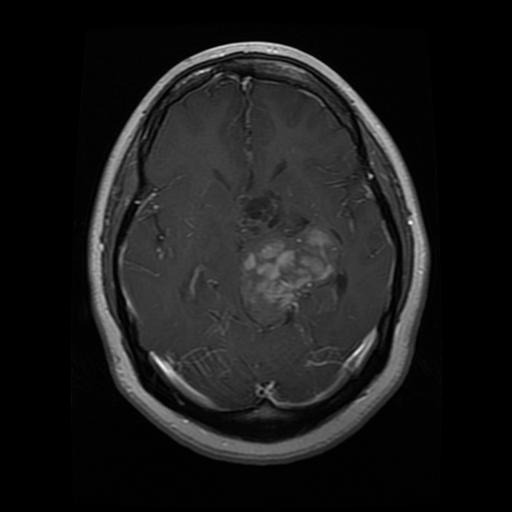

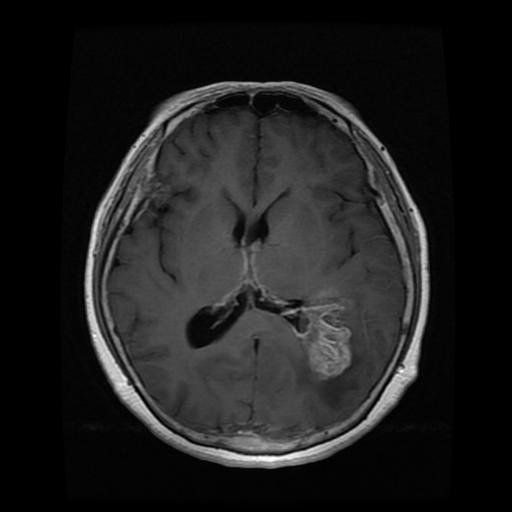

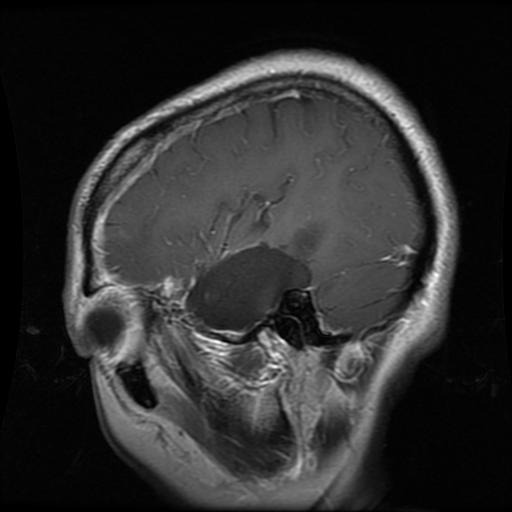

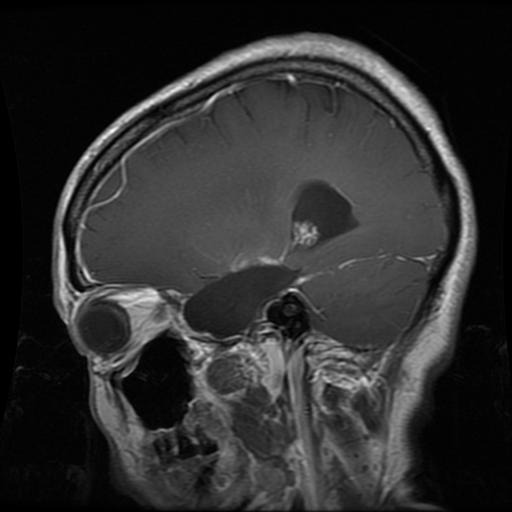

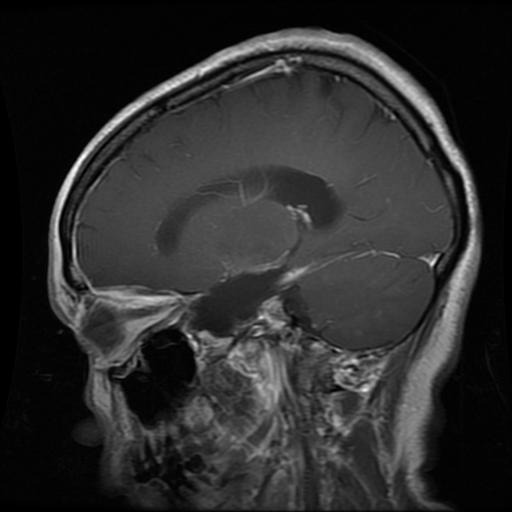

there are  826  images in  glioma_tumor class

 MENINGIOMA_TUMOR


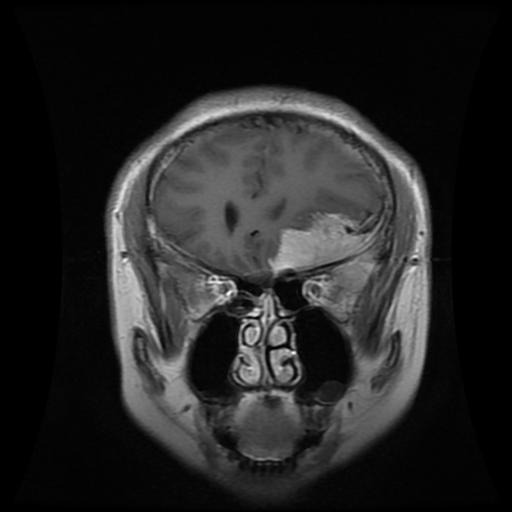

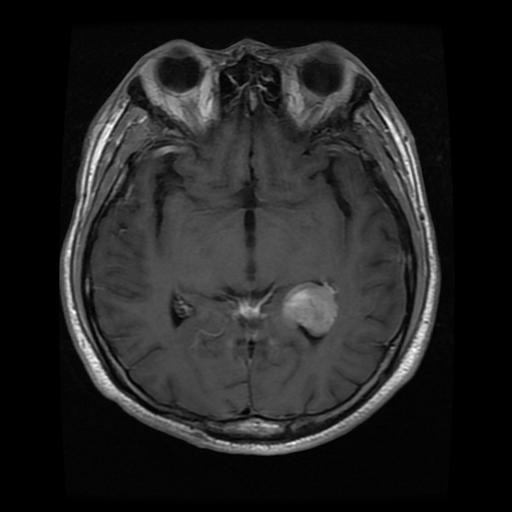

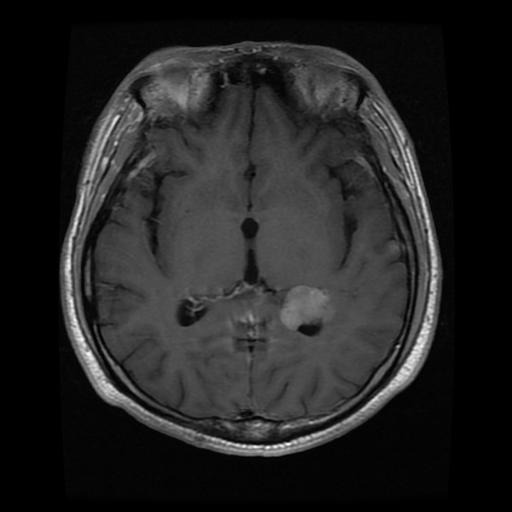

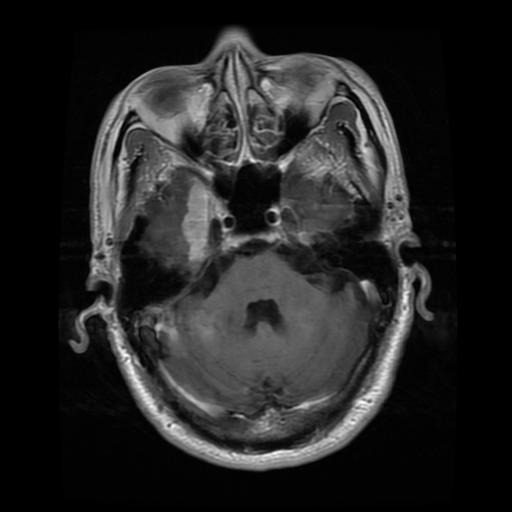

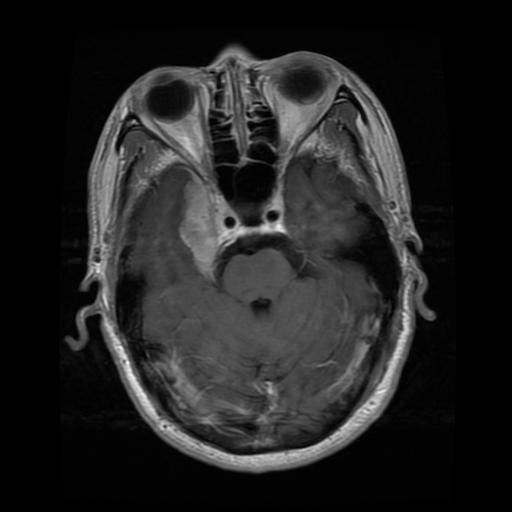

there are  822  images in  meningioma_tumor class

 NO_TUMOR


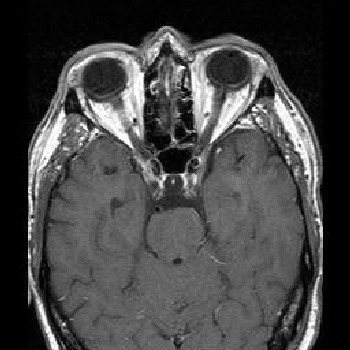

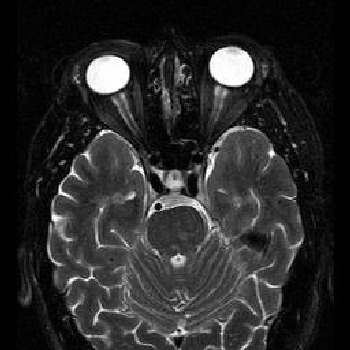

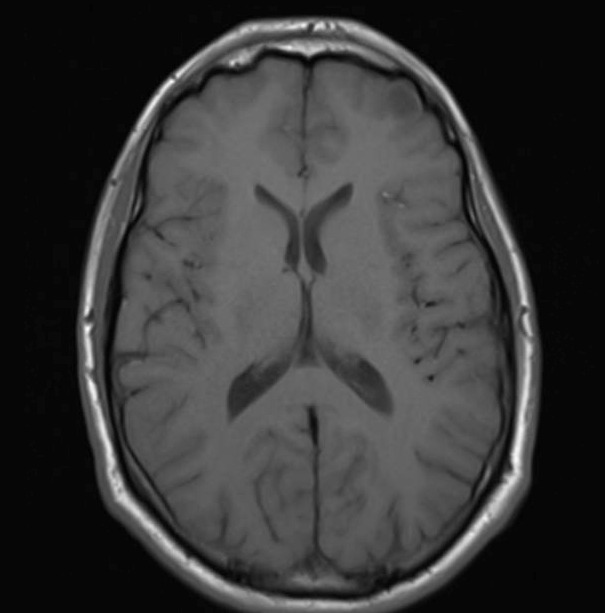

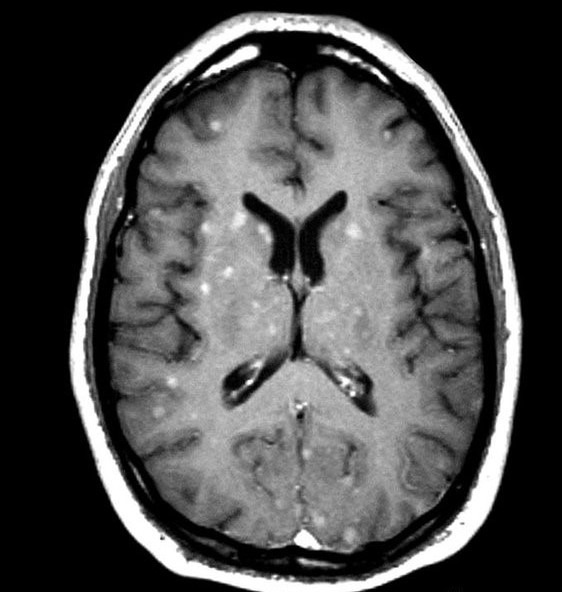

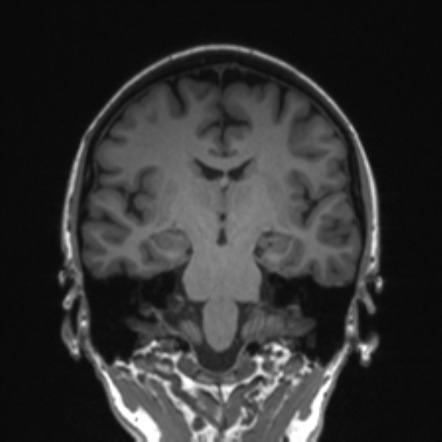

there are  395  images in  no_tumor class

 PITUITARY_TUMOR


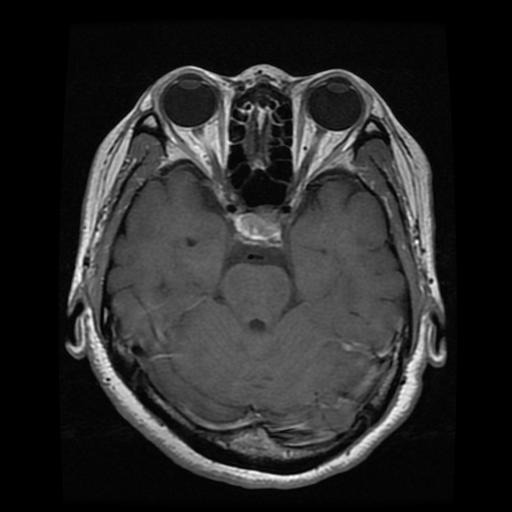

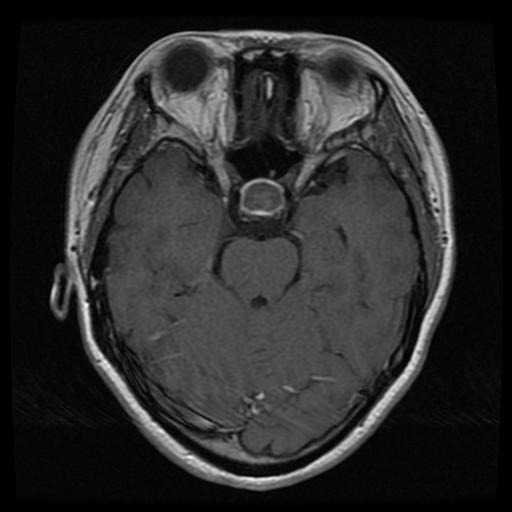

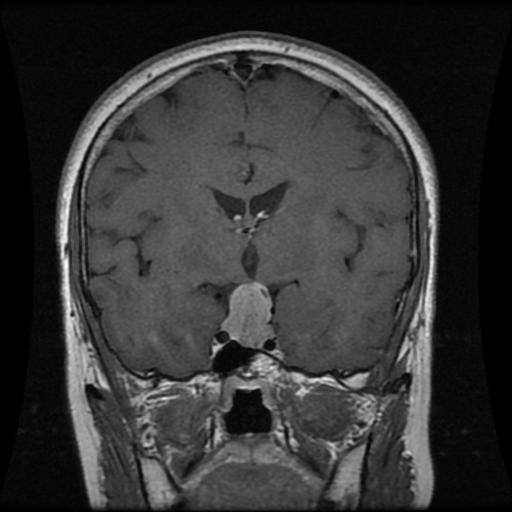

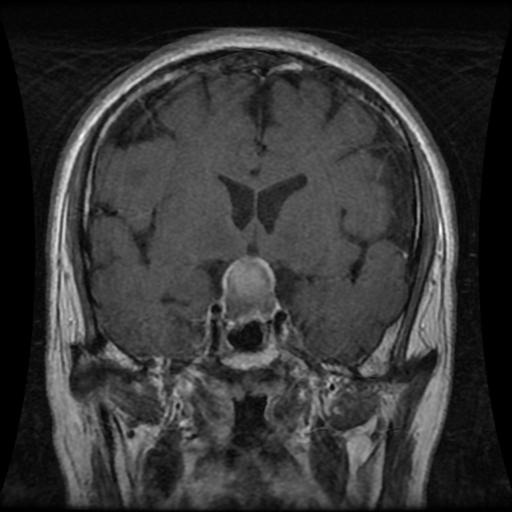

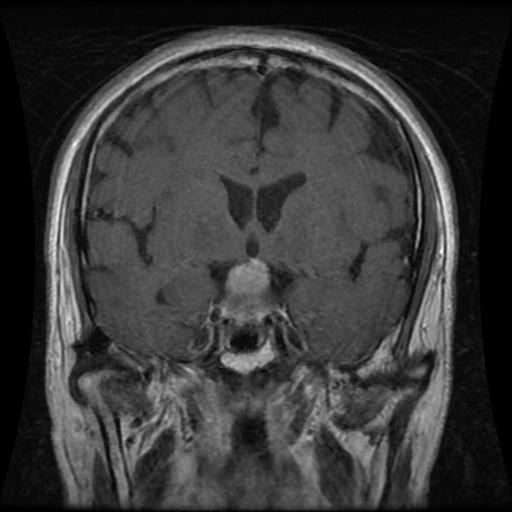

there are  827  images in  pituitary_tumor class


In [4]:
num = []
for category in categories:
    path = r"C:/Users/giorg/Jupyter notebooks/Artificial Neural Networks_CW/BrainTumor/Training/{0}/".format(category)
    folder_data = os.listdir(path)
    k = 0
    print('\n', category.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', category, 'class')

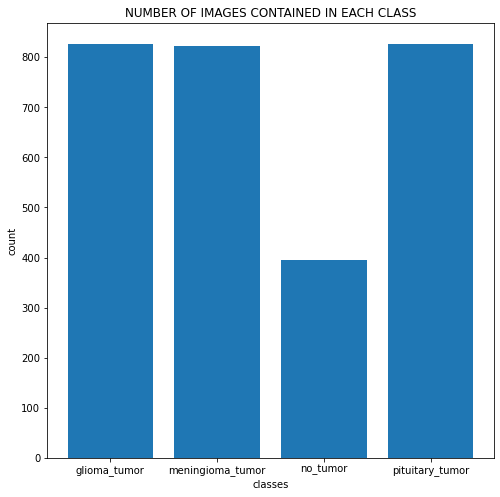

In [5]:
plt.figure(figsize = (8,8))
plt.bar(categories, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [6]:
img_size = 128 # we want to convert all our images to have the same size (some might had different sizes)

array1 = cv2.resize(img_array_tr,(img_size, img_size)) # resizing all the images

In [7]:
train_tumor = []

for i in categories:
    train_path = os.path.join(data_train,i)
    tag = categories.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_tumor.append([new_image_array , tag]) # so the train tumor will consist of the images and the categories 
        except Exception as e:
            pass

In [8]:
X_train = []
y_train = []
for i,j in train_tumor:
    X_train.append(i) # i are basically the images
    y_train.append(j) # j are basically the categories
    
X_train = np.array(X_train).reshape(-1,img_size,img_size) #transform the image into array so as the computer can read them and reshape it
print(X_train.shape)                                      # the -1 indicates that we now have a 1 dimensional array

X_train = X_train/255.0 # we devide with 255 for normalizing
X_train = X_train.reshape(-1,128,128,1)

(2870, 128, 128)


In [9]:
test_tumor = []

for i in categories:
    test_path = os.path.join(data_test,i)
    tag = categories.index(i)
    for img in os.listdir(test_path):
        try:
            image_arr = cv2.imread(os.path.join(test_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            test_tumor.append([new_image_array , tag]) # so the train tumor will consist of the images and the categories 
        except Exception as e:
            pass

In [10]:
X_test = []
y_test = []
for i,j in test_tumor:
    X_test.append(i) # i is basically the images
    y_test.append(j) # is basically the categories
    
X_test = np.array(X_test).reshape(-1,img_size,img_size) #transform the image into array so as the computer can read them and reshape it
print(X_test.shape)                                      # the -1 indicates that we now have a 1 dimensional array

X_test = X_test/255.0 
X_test = X_test.reshape(-1,128,128,1)

(394, 128, 128)


In [11]:
# convert the brain tumor categories into numbers using one-hot-encoding

y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

In [12]:
# our dataset is already split into train-test, so we just need to also use some data for validation

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 128, 128, 1)
x_test shape (574, 128, 128, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


# Model Creation

In [13]:
resnet_model = Sequential()

resnet_model.add(ResNet50(include_top=False, input_shape=(img_size, img_size, 1), pooling='avg', weights=None)) #check the weights
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.25))
resnet_model.add(Dense(2048, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(4, activation='softmax'))

resnet_model.layers[0].trainable = False


In [14]:
#define optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#compile the model
resnet_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

es = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience = 3)

In [15]:
# The number of epochs is the number of complete passes through the training dataset
# The batch size is a number of samples processed before the model is updated
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  # we do this for normalising our data 

batch_size=20
datagen.fit(X_train)
history = resnet_model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 30, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size, callbacks = [es])

Epoch 1/30
114/114 [==============================] - 83s 696ms/step - loss: 1.5230 - accuracy: 0.5299 - val_loss: 1.3309 - val_accuracy: 0.2927
Epoch 2/30
114/114 [==============================] - 76s 663ms/step - loss: 0.9250 - accuracy: 0.6311 - val_loss: 1.3372 - val_accuracy: 0.4321
Epoch 3/30
114/114 [==============================] - 76s 670ms/step - loss: 0.8089 - accuracy: 0.6847 - val_loss: 1.3355 - val_accuracy: 0.3049
Epoch 4/30
114/114 [==============================] - 80s 700ms/step - loss: 0.7827 - accuracy: 0.6765 - val_loss: 1.5312 - val_accuracy: 0.3014
Epoch 5/30
114/114 [==============================] - 78s 689ms/step - loss: 0.7734 - accuracy: 0.6858 - val_loss: 0.9310 - val_accuracy: 0.5697
Epoch 6/30
114/114 [==============================] - 81s 710ms/step - loss: 0.7112 - accuracy: 0.7001 - val_loss: 1.1743 - val_accuracy: 0.5192
Epoch 7/30
114/114 [==============================] - 78s 683ms/step - loss: 0.7468 - accuracy: 0.6857 - val_loss: 0.7141 - val_ac

In [16]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23581440  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2

# Model Evaluation

In [17]:
[test_loss, test_acc] = resnet_model.evaluate(X_test, y_test, verbose=2)
[val_loss, val_acc] = resnet_model.evaluate(X_val, Y_val, verbose=2)
[train_loss, train_acc] = resnet_model.evaluate(X_train, Y_train, verbose=2)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Validation Data : Loss = {}, accuracy = {}".format(val_loss, val_acc))
print("Evaluation result on Training Data : Loss = {}, accuracy = {}".format(train_loss, train_acc))

13/13 - 10s - loss: 2.1674 - accuracy: 0.5178
18/18 - 14s - loss: 0.7214 - accuracy: 0.6620
72/72 - 56s - loss: 0.5813 - accuracy: 0.7361
Evaluation result on Test Data : Loss = 2.167363405227661, accuracy = 0.5177664756774902
Evaluation result on Validation Data : Loss = 0.721377968788147, accuracy = 0.6620209217071533
Evaluation result on Training Data : Loss = 0.5812764167785645, accuracy = 0.7360627055168152


Text(0.5, 1.0, 'Loss Curves')

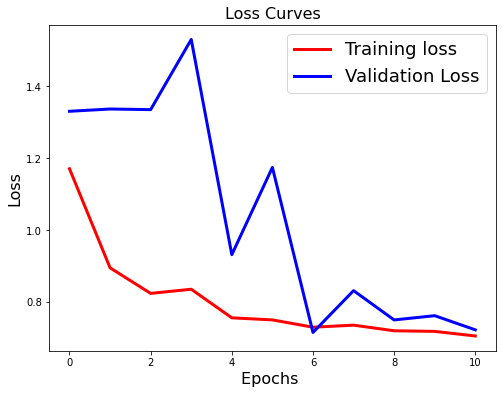

In [18]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

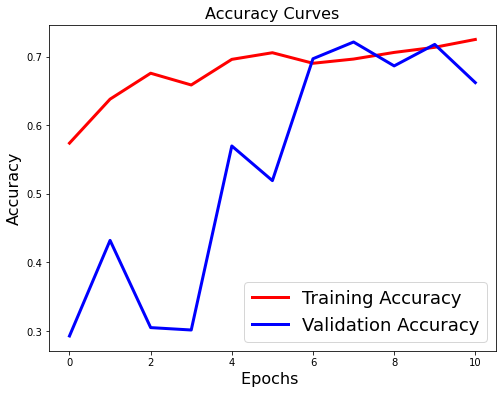

In [19]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [20]:
def plot_confusion_matrix(cm, categories,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
Y_pred = resnet_model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

In [22]:
cnf_matrix = metrics.confusion_matrix(Y_true, Y_pred_classes)
cnf_matrix

array([[14, 44, 35,  7],
       [ 3, 89, 17,  6],
       [ 8, 37, 60,  0],
       [10,  7, 16, 41]], dtype=int64)

Text(0.5, 1.0, 'ResNet Confusion Matrix')

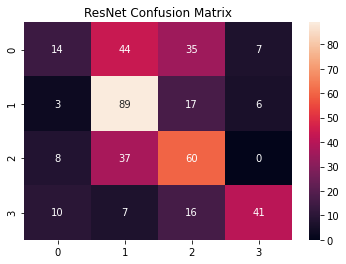

In [23]:
sns.heatmap(cnf_matrix, annot=True,fmt = 'd')
plt.title("ResNet Confusion Matrix")

In [24]:
print("Classification report for classifier %s:\n%s\n"
      % (resnet_model, metrics.classification_report(Y_true, Y_pred_classes, target_names = categories)))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000282B4D4A970>:
                  precision    recall  f1-score   support

    glioma_tumor       0.40      0.14      0.21       100
meningioma_tumor       0.50      0.77      0.61       115
        no_tumor       0.47      0.57      0.52       105
 pituitary_tumor       0.76      0.55      0.64        74

        accuracy                           0.52       394
       macro avg       0.53      0.51      0.49       394
    weighted avg       0.52      0.52      0.49       394


